In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train =  pd.read_csv("../data/python-data-analysis-master/data/titanic_train.csv")
df_test =  pd.read_csv("../data/python-data-analysis-master/data/titanic_test.csv")
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [2]:
print(df_train.info())
print('----------------------')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393

In [3]:
#데이터셋에서 drop 함수를 통해 불필요한 피쳐값을 제거
df_train = df_train.drop(['name','ticket','body','cabin','home.dest'], axis=1)
df_test = df_test.drop(['name','ticket','body','cabin','home.dest'], axis=1)

0    563
1    353
Name: survived, dtype: int64


<AxesSubplot:>

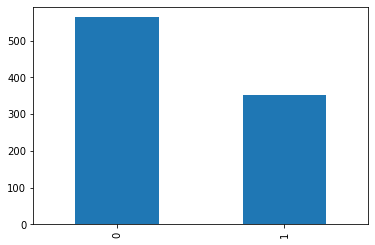

In [4]:
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

3    498
1    230
2    188
Name: pclass, dtype: int64


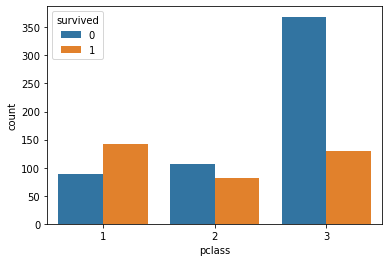

In [5]:
#survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피쳐의 분포를 분석
print(df_train["pclass"].value_counts())
ax = sns.countplot(x='pclass',hue = 'survived',data = df_train)

In [6]:
#변수 탑색작업 자동화
from scipy import stats

#두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check=True):
    #두 집단 (survived = 1, survived=0)의 분포 그래프를 출력합니다
    g = sns.FacetGrid(df,col='survived')
    g.map(plt.hist, col_name, bins=30)
    
    #두 집단 (survived = 1, survived = 0)의 분포 그래프를 출력
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('data std is', '%2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survive_static = np.array(titanic_n_survived[col_name])
    print("data std is", "%2f" % np.std(titanic_n_survive_static))
    
    # T-test로 두 집단의 평균 차이를 검정합니다.
    tTestResult = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name],equal_var=False)
    print('The t-statistic and p-value assuming equal variances is %.3f and %.3f' % tTestResult)
    print('The t-statistic and p-value not assuming equal variances is %.3f and %.3f' % tTestResultDiffVar)
    
    if distribution_check:
        #Shapiro-Wilk 검정: 분포의 정규성 정도를 검증
        print('The w-statistic and p-value in Suvived %.3f and %.3f' % stats.shapiro(titanic_survived[col_name]))
        print('The w-statistic and p-value in Non-Suvived %.3f and %.3f' % stats.shapiro(titanic_n_survived[col_name]))

data std is 14.217911
data std is 13.710057
The t-statistic and p-value assuming equal variances is -0.546 and 0.585
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Suvived 0.982 and 0.001
The w-statistic and p-value in Non-Suvived 0.968 and 0.000
data std is 0.644624
data std is 1.337840
The t-statistic and p-value assuming equal variances is -2.118 and 0.034
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015


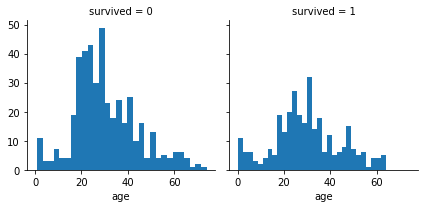

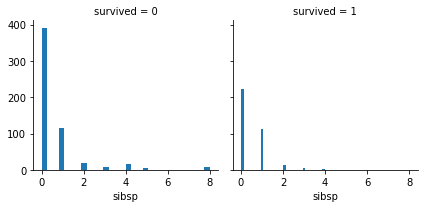

In [7]:
#앞에서 정의한 valid_features 함수를 실행. age 와 sibsp를 탐색
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check = True)
valid_features(df_train, 'sibsp', distribution_check=False)

In [8]:
#age의 결측값을 평균값으로 대체합니다.
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embark: 2개의 결측값을 최빈값으로 대체합니다.
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked']=df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

#원-핫 인코딩을 위한 통합 데이터 프레임(whole_df)을 생성합니다.
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

#pandas 패키지를 이용한 원-핫 인코딩을 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

C:\Users\pjh23\AppData\Local\Temp\ipykernel_15708\1819210201.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_df = df_train.append(df_test)


,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [9]:
#로지스틱 회기 모델 사용
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#데이터를 학습 데이터셋, 테스트 데이터셋으로 분리
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_train.columns != 'survived'].values, df_test['survived'].values

#로지스틱 회귀 모델을 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

#학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환합니ㅏㄷ.
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print('accuracy : %.2f' % accuracy_score(y_test, y_pred))
print('Precision : %.3f' % precision_score(y_test, y_pred))
print('Recall : %.3f' % recall_score(y_test, y_pred))
print('F1 : %.3f' % f1_score(y_test, y_pred))

accuracy : 0.80
Precision : 0.756
Recall : 0.673
F1 : 0.712


In [11]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


AUC : 0.838


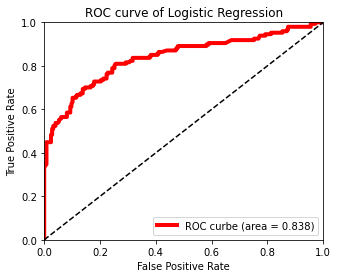

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

#AUC(Area Under the Curve)를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC : %.3f' % roc_auc)

#ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curbe (area = %0.3f)' % roc_auc, color = 'red', linewidth=4.0)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic Regression')
plt.legend(loc='lower right')

Accuracy: 0.80
Precision: 0.756
Recall: 0.673
F1: 0.712
AUC : 0.732


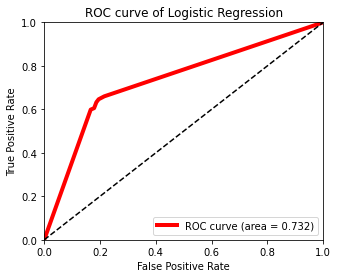

In [13]:
# dicision tree
from sklearn.tree import DecisionTreeClassifier

#의사 결정 나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환합니다.
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred+dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

#학습한 모델의 성능을 계산하여 출력
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

#학습한 모델의 AUC 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC : %.3f' % roc_auc)

#ROC curve를 그래프로 출력합니다
plt.rcParams['figure.figsize']=[5,4]
plt.plot(false_positive_rate,true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic Regression')
plt.legend(loc='lower right')

In [77]:
#모델 개선
#분류 모델을 위해 전처리
#데이터를 다시 불러오기

df_train = pd.read_csv("../data/python-data-analysis-master/data/titanic_train.csv")
df_test = pd.read_csv("../data/python-data-analysis-master/data/titanic_test.csv")
df_train = df_train.drop(['ticket','body',"home.dest"],axis=1)
df_test = df_test.drop(['ticket','body',"home.dest"],axis=1)

# age의 결측값을 평균값으로 대체
replace_mean = df_train[df_train['age'] > 0 ]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embark: 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

#원-핫 인코딩을 위한 통합 데이터 프레임(whole_df) 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

C:\Users\pjh23\AppData\Local\Temp\ipykernel_15708\3420299706.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_df = df_train.append(df_test)


In [78]:
print(whole_df['cabin'].value_counts()[:10])

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
F33                4
C78                4
D                  4
F2                 4
C22 C26            4
Name: cabin, dtype: int64


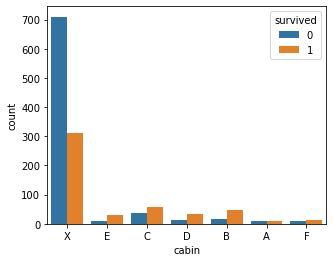

In [79]:
# 결측 데이터의 경우는 X로 대체
whole_df["cabin"] = whole_df['cabin'].fillna('X')
#cabin 피처의 첫번쨰 알파벳을 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])
#추출한 알파벳 중, G와T는 수가 너무 작기 떄문에 마찬가지로 x로 대체
whole_df['cabin'] = whole_df['cabin'].replace({'G':"X", "T":"X"})

ax = sns.countplot(x='cabin', hue = 'survived', data=whole_df)
plt.show()

In [80]:
#이름에서 호칭을 추출합니다.
name_grade = whole_df['name'].apply(lambda x : x.split(",",1)[1].split('.')[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

[' Miss', ' Mr', ' Master', ' Mrs', ' Dr', ' Mlle', ' Col', ' Rev', ' Ms', ' Mme', ' Sir', ' the Countess', ' Dona', ' Jonkheer', ' Lady', ' Major', ' Don', ' Capt']


In [81]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의합니다.
grade_dict = {'A' : ['Rev','Col','Major','Dr','Capt','Sir'], #명예직
             'B' : ['Ms','Mme','Mrs','Dona'], # 여성
             'C' : ['jonkheer', 'the Countess'], # 귀족,작위
             'D' : ['Mr', 'Don'], # 남성
             'E' : ['Master'], # 젋은 남자
             'F' : ['Miss', 'Mlle', 'Lady']} # 젋은 여자
#정의한 호칭의 기준에 따라 A~F의 문자로 name 피처를 자시 정의하는 함수
def give_grade(x):
    grade = x.split(", ", 1)[1].split('.')[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return "G"

#위의 함수를 적용하여 name 피처를 새롭게 정의
whole_df["name"] = whole_df['name'].apply(lambda x: give_grade(x))
print(whole_df['name'].value_counts())

D    758
F    263
B    201
E     61
A     24
C      1
G      1
Name: name, dtype: int64


In [84]:
# 판다스 패키지를 이용한 원-핫 인코딩을 수행합니다.
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Accuracy : 0.80
Precision : 0.734
Recall : 0.714
F1 : 0.724
AUC : 0.852


C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


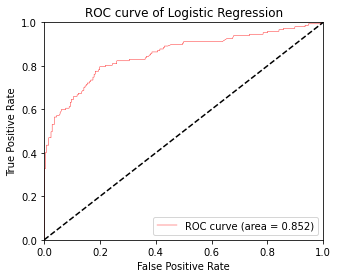

In [86]:
#데이터를 학습데이터셋, 테스트 데이터 셋으로 분리
x_train, y_train = df_train.loc[:,df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:,df_test.columns != 'survived'].values, df_test['survived'].values
# 로지스틱 회귀 모델을 학습
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)
# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]
#테스트 데이터셋에 대한 aacuracy,precision,recall,f1, 평가 지표를 각각 출력
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))
print('Precision : %.3f' % precision_score(y_test, y_pred))
print('Recall : %.3f' % recall_score(y_test, y_pred))
print('F1 : %.3f' % f1_score(y_test, y_pred))
#AUC를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC : %.3f' % roc_auc)
#ROC curve를 그래프로 출력합니다
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=0.4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic Regression')
plt.legend(loc='lower right')

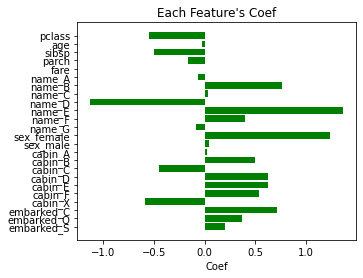

In [91]:
# 예측 대상인 survived 피쳐를 제외한 모든 치쳐를 리스트로 반환(그래프의 y축)
cols = df_train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))
# 각 피쳐별 회귀 분석 계수를 그래프의 x축으로 하여 피쳐 영향력 그래프를 출력합니다.
plt.rcParams["figure.figsize"] = [5,4]
fig, ax = plt.subplots()
ax.barh(y_pos,lr.coef_[0],align='center',color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")

plt.show()

In [94]:
from sklearn.model_selection import KFold

#K-fold 교차 검증의 k를 5로 설정
k = 5
cv = KFold(k, shuffle=True, random_state=0)
auc_history = []

#k-fold를 5번 분할 학습으로 반복
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    #5개로 분할된 fold중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 지정합니다. 매 반복시 마다 테스트 데이터 셋은 변경
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    #survived 피쳐를 y, 나머지 피쳐들을 x데이터로 지정
    splited_x_train, splited_y_train = df_train.loc[:,df_train.columns !='survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:,df_test.columns !='survived'].values, df_test['survived'].values
    #주어진 데이터로 로지스틱 회귀 모델을 학습
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    y_pred_probability = lr.predict_proba(splited_x_test)[:,1]
    #테스트 데이터셋의 AUC를 계산하여 auc_history에 저장
    false_positive_rate, true_positive_rate, threshold = roc_curve(splited_y_test,y_pred_probability)
    roc_auc = roc_auc_score(splited_y_test, y_pred_probability)
    auc_history.append(roc_auc)

C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

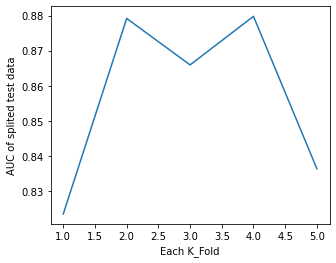

In [95]:
    #auc_history에 저장된 다섯 번의 학습 결과(AUC)를 그래프로 출력
    plt.xlabel('Each K_Fold')
    plt.ylabel('AUC of splited test data')
    plt.plot(range(1, k+1),auc_history) # baseline

C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pjh23\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

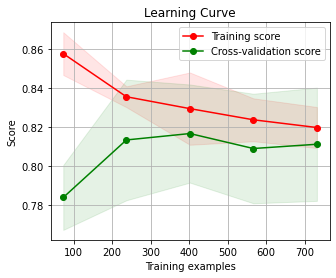

In [96]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()